# k - Nearest Neighbors Algorithm (kNN) - Campus Recruitment

Pedro Mesquita Vasconcelos

06/06/2020

Database Source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

kaggle: https://www.kaggle.com/pedromv/knn-to-predict-campus-placement?scriptVersionId=35753025






<ol>
<li><a href='#Introduction'>Introduction</a></li>
<li><a href='#Loading Data'>Loading Data</a></li>
<li><a href='#Data Analysis'>Data Analysis</a></li>
<li><a href='#Data Preparation'>Data Preparation</a></li>
<li><a href='#kNN'>k-NN Execution</a></li>
<li><a href='#Evaluation'>Evaluation</a></li>
<li><a href='#Summary'>Summary</a></li>
</ol>

## 1. Introduction <a id = "Introduction"></a>

I'm going to explore the dataset from "Campus Recruitment - Academic and Employability Factors influencing placement" provided by Ben Roshan D, MBA in Business Analytics at Jain University and Bangalore. I will work with the supervised machile learning algorithm called k-NN or <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">k-Nearest Neighbors</a>.


"This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students"

The dataset contains the following data:
<ul>
<li><b>sl_no</b> = Serial Number</li>
<li><b>gender</b> = Gender: Male='M', Female='F'</li>
<li><b>ssc_p</b> = Secondary Education percentage - 10th Grade</li>
<li><b>ssc_b</b> = Board of Education- Central/ Others</li>
<li><b>hsc_p</b> = Higher Secondary Education percentage - 12th Grade</li>
<li><b>hsc_b</b> = Board of Education - Central/ Others</li>
<li><b>hsc_s</b> = Specialization in Higher Secondary Education</li>
<li><b>degree_p</b> = Degree Percentage</li>
<li><b>degree_t</b> = Under Graduation(Degree type) - Field of degree education</li>
<li><b>workex</b> = Work Experience</li>
<li><b>etest_p</b> = Employability test percentage ( conducted by college)</li>
<li><b>specialisation</b> = Post Graduation(MBA)- Specialization</li>
<li><b>mba_p</b> = MBA percentage</li>
<li><b>status</b> = Status of placement- Placed/Not placed</li>
<li><b>salary</b> = Salary offered by corporate to candidates</li>
</ul>



## 2. Loading Data <a id = "Loading Data"></a>

First we need to load some libraries and the dataset.

In [1]:
library('funModeling') 
library('Hmisc')
library('dummies')
library('corrplot')
library('gmodels')
library('class')
library('dummies')
library('tidyr')

Warning message:
"package 'funModeling' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

funModeling v.1.9.3 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai
dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'gmodels' was built under R version 3.6.3"Warning message:
"package 'class' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R

In [2]:
data <- read.csv(('Placement_Data_Full_Class.csv'))

Let's explore the dataset.

In [3]:
head(data)
tail(data)

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,210,M,62.0,Central,72,Central,Commerce,65.0,Comm&Mgmt,No,67,Mkt&Fin,56.49,Placed,216000
211,211,M,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed,400000
212,212,M,58.0,Others,60,Others,Science,72.0,Sci&Tech,No,74,Mkt&Fin,53.62,Placed,275000
213,213,M,67.0,Others,67,Others,Commerce,73.0,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed,295000
214,214,F,74.0,Others,66,Others,Commerce,58.0,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed,204000
215,215,M,62.0,Central,58,Others,Science,53.0,Comm&Mgmt,No,89,Mkt&HR,60.22,Not Placed,NA


In [4]:
summary(data)

     sl_no       gender      ssc_p           ssc_b         hsc_p      
 Min.   :  1.0   F: 76   Min.   :40.89   Central:116   Min.   :37.00  
 1st Qu.: 54.5   M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90  
 Median :108.0           Median :67.00                 Median :65.00  
 Mean   :108.0           Mean   :67.30                 Mean   :66.33  
 3rd Qu.:161.5           3rd Qu.:75.70                 3rd Qu.:73.00  
 Max.   :215.0           Max.   :89.40                 Max.   :97.70  
                                                                      
     hsc_b          hsc_s        degree_p          degree_t   workex   
 Central: 84   Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141  
 Others :131   Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74  
               Science : 91   Median :66.00   Sci&Tech : 59            
                              Mean   :66.37                            
                              3rd Qu.:72.00                            


In [5]:
str(data)

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

In [6]:
summary(data)

     sl_no       gender      ssc_p           ssc_b         hsc_p      
 Min.   :  1.0   F: 76   Min.   :40.89   Central:116   Min.   :37.00  
 1st Qu.: 54.5   M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90  
 Median :108.0           Median :67.00                 Median :65.00  
 Mean   :108.0           Mean   :67.30                 Mean   :66.33  
 3rd Qu.:161.5           3rd Qu.:75.70                 3rd Qu.:73.00  
 Max.   :215.0           Max.   :89.40                 Max.   :97.70  
                                                                      
     hsc_b          hsc_s        degree_p          degree_t   workex   
 Central: 84   Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141  
 Others :131   Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74  
               Science : 91   Median :66.00   Sci&Tech : 59            
                              Mean   :66.37                            
                              3rd Qu.:72.00                            


Dropping sl_no column and salary columns, since they don't give us useful information for predicting the student placement.

In [7]:
data = data[,!names(data) %in% 'sl_no']
data = data[,!names(data) %in% 'salary']
data[data==''] <- NA #To make sure missing data is NA

head(data)

gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed


## 3. Data Analysis <a id = "Data Analysis"></a>

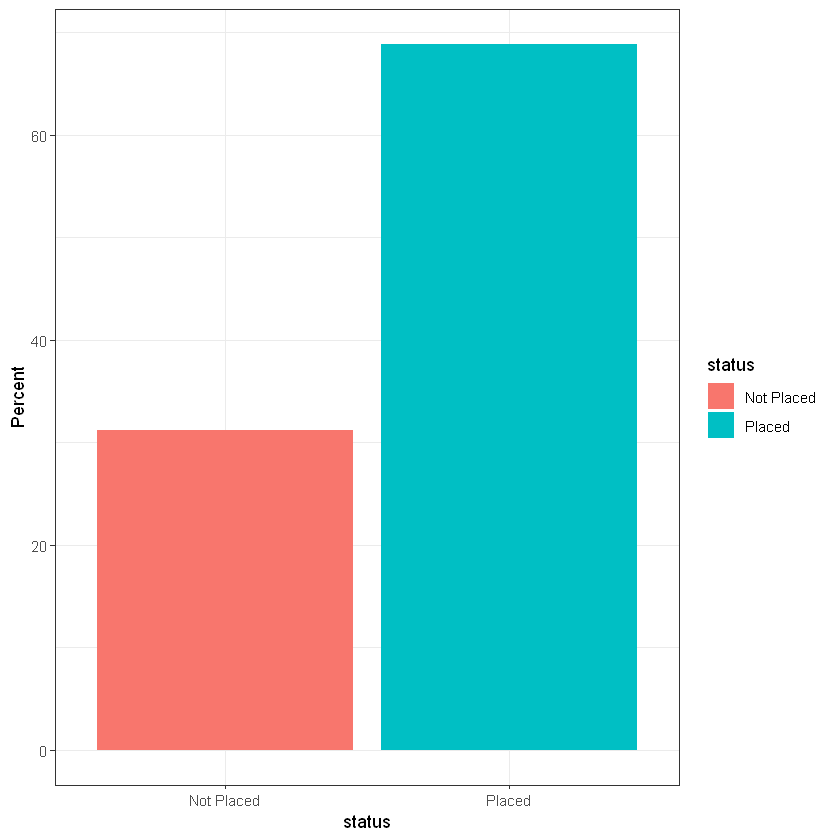

In [8]:
theme_set(theme_bw())
ggplot(data, aes(x = status, fill = status)) +  
  geom_bar(aes(y = ((..count..)/sum(..count..)) * 100)) +
  ylab("Percent")

Around 64% of the students in our dataset got "Placed".

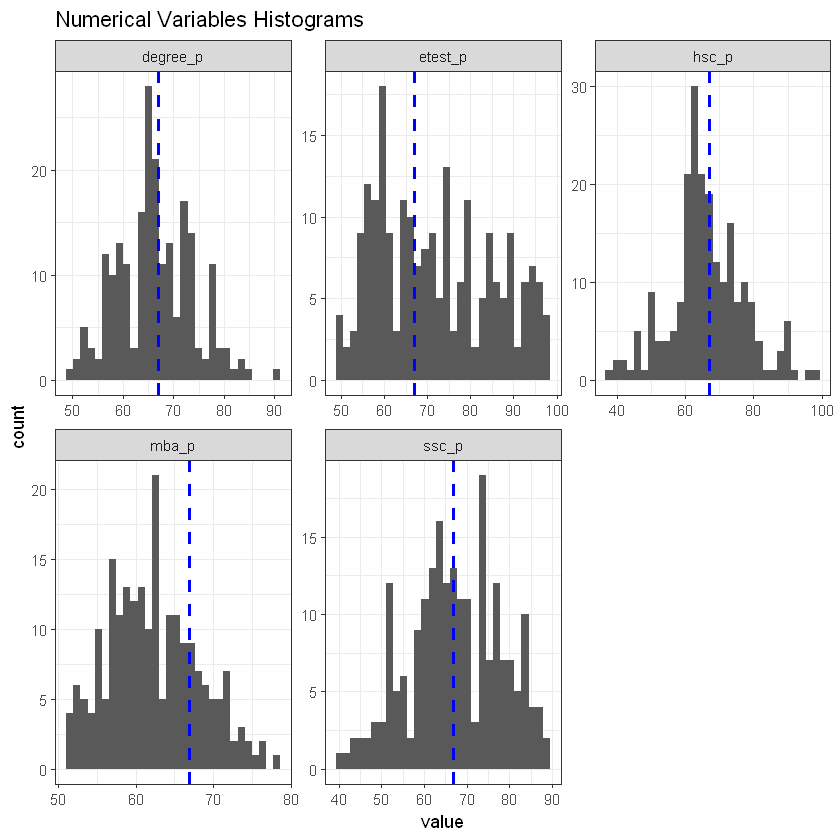

In [9]:
#Selecting only the numerical data
num_data = subset(data, select = c(2,4,7,10,12)) 

num_data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram(bins = 30) +
    geom_vline(aes(xintercept=mean(value)), color="blue", linetype="dashed", size=1)+
    ggtitle("Numerical Variables Histograms")


Warning message:
"attributes are not identical across measure variables;
they will be dropped"

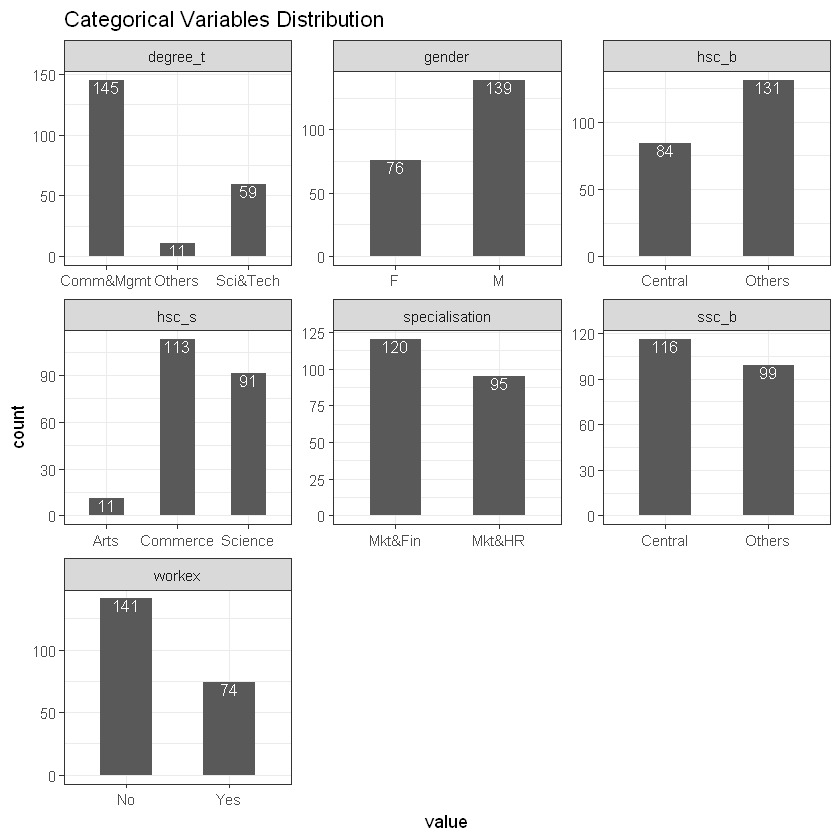

In [10]:
#Subsetting the categorical variables
cat_data = subset(data, select = c(1,3,5,6,8,9,11))

cat_data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_bar(stat='count', width = 0.5) + 
    geom_text(stat = 'count', aes(label=..count..), vjust = 1, size = 3.5, color ="white")+
    ggtitle("Categorical Variables Distribution")
    


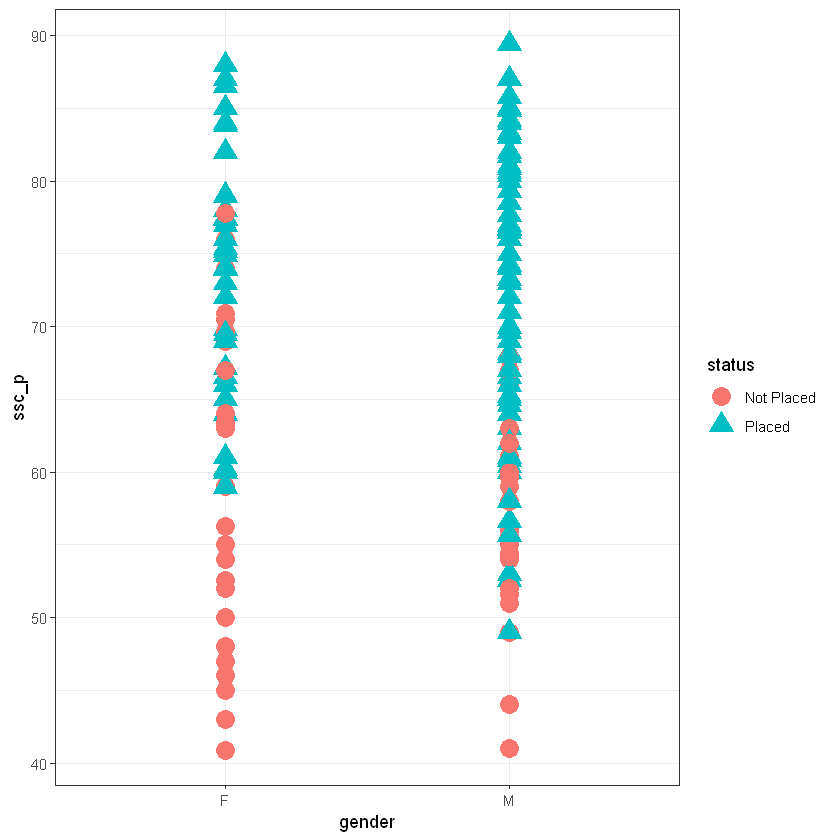

In [11]:
ggplot(data, aes(x=gender, y=ssc_p,shape=status, color=status))+
    geom_point(size=5)

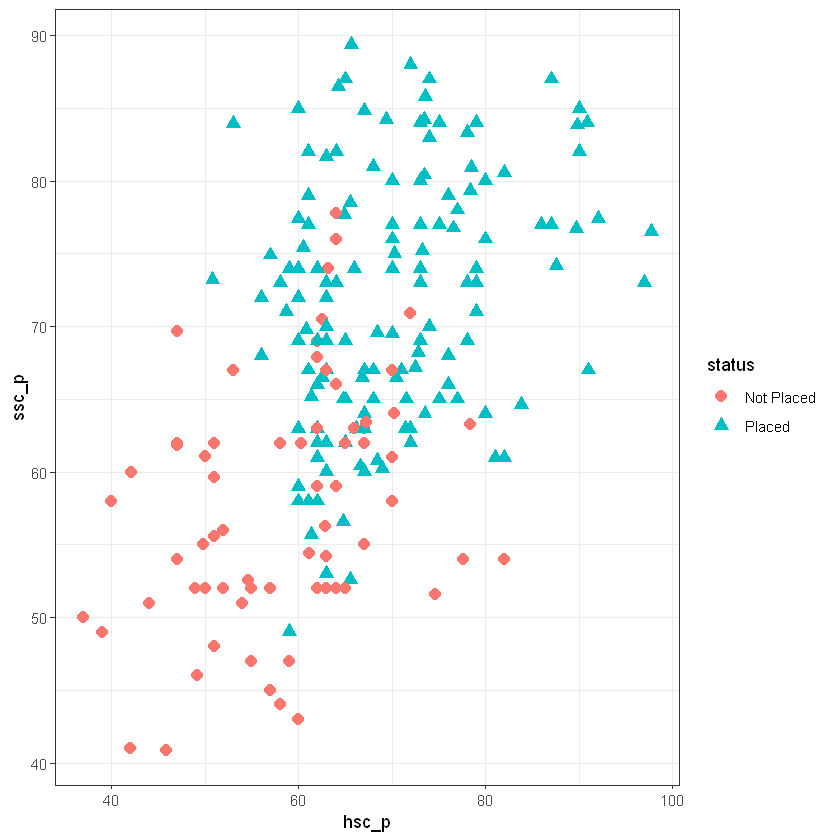

In [12]:
ggplot(data, aes(x=hsc_p, y=ssc_p,shape=status, color=status)) +
    geom_point(size=3) 

As expected we can see a high correlation between the <b>High Secondary Education percentage</b> and the <b> Secondary Educatio Percentage </b> on the students placement.

Let's have a look to the variables correlation matrix.

In [14]:
categorical_s = c('gender','hsc_s','ssc_b','hsc_b','ssc_s','degree_t','workex','specialisation','status')#List of all categorical variables
results_s <- fastDummies::dummy_cols(data, select_columns = categorical_s) #creating the dummy columns
res_s <- results_s[, !(names(results_s) %in% categorical_s)] #deleting initial columns


Warning message in fastDummies::dummy_cols(data, select_columns = categorical_s):
"NOTE: The following select_columns input(s) is not a column in data.
	"

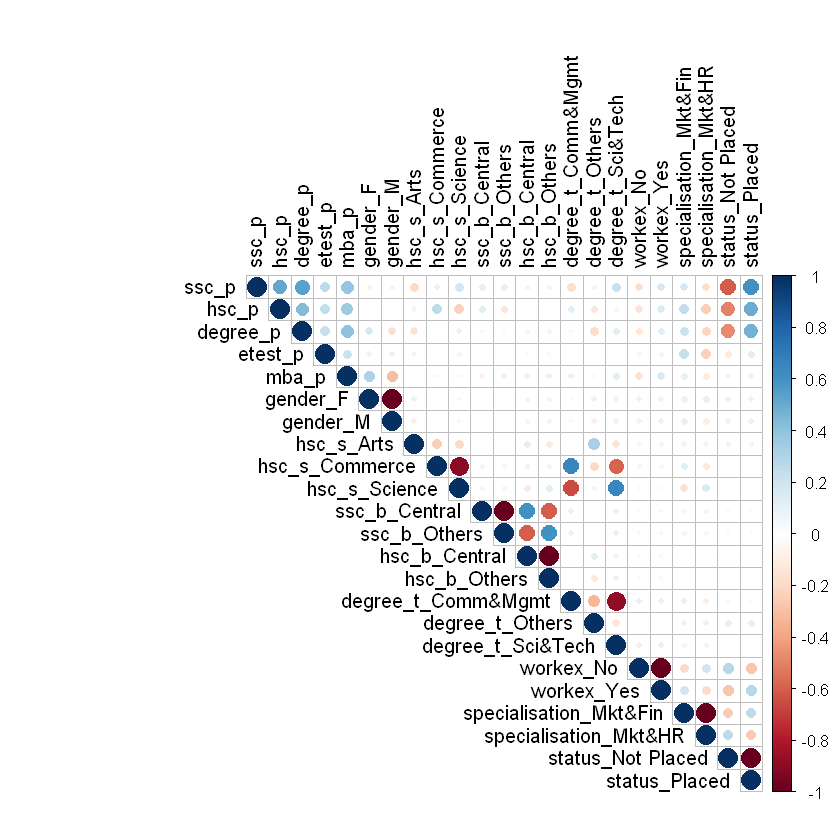

In [16]:
corrplot(cor(res_s), type = 'upper', method = 'circle',  tl.col = 'black',  p.mat = res_s$P, sig.leve = 0.05)

## 4. Data Preparation <a id = "Data Preparation"></a>

First we need to transform all our categorical variables (apart from our target variable: <b>status</b>) into numerical by creating dummy bolooen columns.

In [17]:
categorical = c('gender','hsc_s','ssc_b','hsc_b','ssc_s','degree_t','workex','specialisation')
results <- fastDummies::dummy_cols(data, select_columns = categorical) #creating the dummy columns
res <- results[, !(names(results) %in% categorical)] #deleting initial columns


Warning message in fastDummies::dummy_cols(data, select_columns = categorical):
"NOTE: The following select_columns input(s) is not a column in data.
	"

Afterwards we need to normalize the quantitative variables to express them in the same range of values.

In [18]:
#Normalize() funciton
normalize <- function(x) {
num <- x - min(x)
denom <- max(x) - min(x)
return (num/denom)
}

# Normalize our placement dataset
plac_norm <- as.data.frame(lapply(res[,c(1:5,7:22)], normalize)) #all columns apart from status (column 6)


Then we split the data set into two: a training set and a test set. 
The first is used to train the model, while the second is used to evaluate the trained model.

In [19]:
set.seed(1234)
#Training set will be 2/3 of original data set
ind <- sample(2, nrow(plac_norm), replace=TRUE, prob=c(0.666, 0.334))

plac.training <- plac_norm[ind == 1,]
plac.test <- plac_norm[ind == 2,]


Creating a vector for each train/test dataset with our target variable "status".

In [20]:
plac.trainLabels <- res[ind==1,6] #column 6 is our target.
plac.testLabels <- res[ind==2,6]

## 5. k-NN Execution<a id = "kNN"></a>

Now we want to find the k nearest neighbors of our training set.

We will be using the `knn()` function, which uses the Euclidian distance measure in order to find the k-nearest neighbors to our new, unknown instance. Here, <i>k</i> parameter needs to be set.


In [21]:
# Execution of k-NN with k = 1
knn_1 <- knn(plac.training, plac.test, plac.trainLabels, k=1, prob = TRUE)

# Execution of k-NN with k = 2
knn_2 <- knn(plac.training, plac.test, plac.trainLabels, k=2, prob = TRUE)

## 6. Evaluation<a id = "Evaluation"></a>

To evaluate our model we will use a confusion matrix and the calculated model accuracy with different values of <i>k</i> to study which one offers the best result.

In [22]:
# Accuracy of KnnTestPrediction for k = 1
round(sum(knn_1==plac.testLabels)/length(plac.testLabels)*100,2)

# Confusion matrix of KnnTestPrediction for k = 1
table(plac.testLabels, knn_1)

[1] 65.08

               knn_1
plac.testLabels Not Placed Placed
     Not Placed         10     11
     Placed             11     31

We can interpret the matrix:
<ul>
    <li>10 of the 21 students in the test data are correctly predicted as "Not Placed", whereas the reamining 11 are misclassified;</li>
    <li>31 of the 42 students in the test data are correctly predicted as "Placed" and 11 are misclassfied.</li>
    <li>giving an accuracy of 65.08%</li>
</ul>

The model is doing a decent job predicting students to be placed (which is what we are most interested on) but doing a bad job on identifying students that weren't placed. 

On the run below with a k = 2 the model accuracy is the same, but it is doing a worse job since it decreased the number predicted "Placed" students, meaning that is increasing the "False Positives".

Our goal is to correctly predict the students that will be placed.

In [23]:
# Accuracy of KnnTestPrediction for k = 2
round(sum(plac.testLabels==knn_2)/length(plac.testLabels)*100,2)

# Confusion matrix of KnnTestPrediction for k = 2
table(plac.testLabels, knn_2)

[1] 65.08

               knn_2
plac.testLabels Not Placed Placed
     Not Placed         11     10
     Placed             12     30

To graphically show which values of `k` give us the best classification, we can plot <b>"Accuracy vs k number of Neighbors" </b>

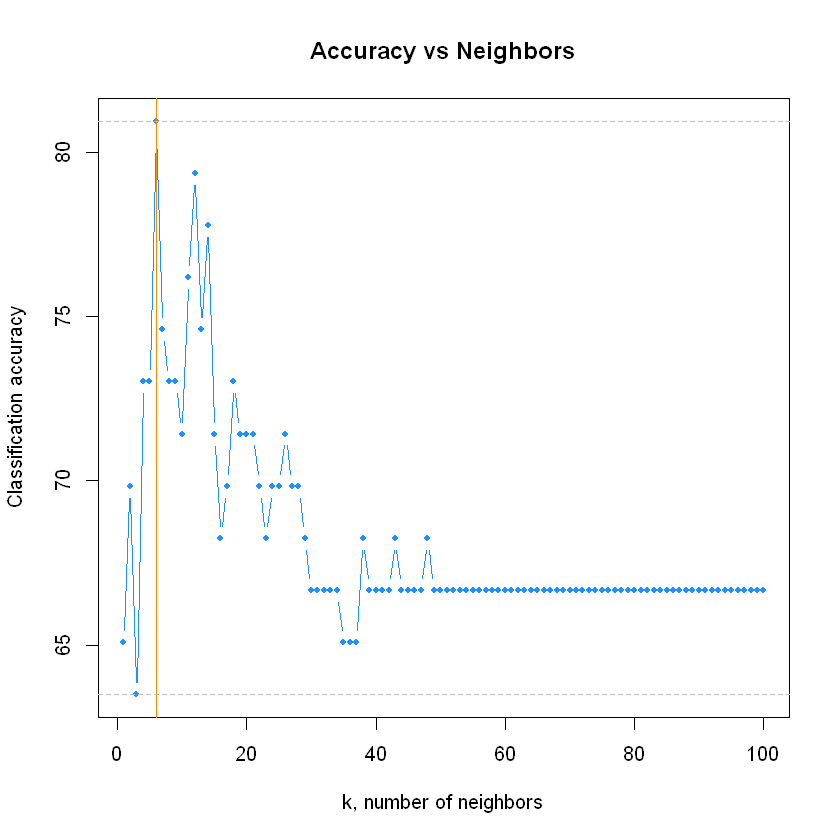

In [31]:
# Creating the variables
KnnTestPrediction <- list()
accuracy <- numeric()

# Simulating from k=1 to k=100...
for(k in 1:100){

  # KnnTestPrediction for each k
  KnnTestPrediction[[k]] <- knn(plac.training, plac.test, plac.trainLabels, k, prob=TRUE)
    
  # Accuracy for each k   
  accuracy[k] <- sum(KnnTestPrediction[[k]]==plac.testLabels)/length(plac.testLabels)*100

}

# Accuracy vs number of k
plot(accuracy, type="b", col="dodgerblue", cex=1, pch=20,
     xlab="k, number of neighbors", ylab="Classification accuracy", 
     main="Accuracy vs Neighbors")

# line for k with best accuracy
abline(v=which(accuracy==max(accuracy)), col="darkorange", lwd=1.5)

# line for max accuracy seen
abline(h=max(accuracy), col="grey", lty=2)

# line for min accuracy seen
abline(h=min(accuracy), col="grey", lty=2)


In [42]:
# Execution of k-NN with k = 6
knn <- knn(plac.training, plac.test, plac.trainLabels, k=6, prob = TRUE)

# Accuracy of KnnTestPrediction for k = 6
round(sum(plac.testLabels==knn)/length(plac.testLabels)*100,2)

# Confusion matrix of KnnTestPrediction for k = 6
table(plac.testLabels, knn)

[1] 80.95

               knn
plac.testLabels Not Placed Placed
     Not Placed         10     11
     Placed              1     41

To reach the maximum accuracy with this model the `k` value is <b>6</b>. The model is doing a great job with an accuracy of 81% and only mispredicting 1 "Placed" student.

## 7. Summary<a id = "Summary"></a>

The found k-NN model is doing a good job on the prediction of the students placed with an accuarcy of <b>81%</b>, where the max accuracy is obtained with `k = 6`.

In order to try to further improve the model we could do further analysis on variable reduction to see how it performs. 